In [1]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [3]:
training=train_data.flow_from_directory('/content/drive/MyDrive/Food VietNam/Train',target_size=(150,150), batch_size=32, class_mode='categorical')


Found 3008 images belonging to 10 classes.


In [4]:
training.class_indices

{'Banh cuon': 0,
 'Banh mi': 1,
 'Banh pia': 2,
 'Banh tet': 3,
 'Banh xeo': 4,
 'Bun dau mam tom': 5,
 'Ca kho to': 6,
 'Com tam': 7,
 'Nem': 8,
 'Pho': 9}

In [5]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(150,150,3), padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu', padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

#ANN
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10,activation='softmax'))

#Compile
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [6]:
train=model.fit(training,epochs=50,batch_size=128,verbose=1)

Epoch 1/50
94/94 [==============================] - 708s 7s/step - loss: 2.0603 - accuracy: 0.2743
Epoch 2/50
94/94 [==============================] - 283s 3s/step - loss: 1.5140 - accuracy: 0.4910
Epoch 3/50
94/94 [==============================] - 266s 3s/step - loss: 1.2873 - accuracy: 0.5701
Epoch 4/50
94/94 [==============================] - 275s 3s/step - loss: 1.1460 - accuracy: 0.6277
Epoch 5/50
94/94 [==============================] - 272s 3s/step - loss: 1.0059 - accuracy: 0.6632
Epoch 6/50
94/94 [==============================] - 274s 3s/step - loss: 0.9403 - accuracy: 0.6865
Epoch 7/50
94/94 [==============================] - 275s 3s/step - loss: 0.8523 - accuracy: 0.7164
Epoch 8/50
94/94 [==============================] - 277s 3s/step - loss: 0.7186 - accuracy: 0.7626
Epoch 9/50
94/94 [==============================] - 269s 3s/step - loss: 0.6287 - accuracy: 0.7892
Epoch 10/50
94/94 [==============================] - 267s 3s/step - loss: 0.5648 - accuracy: 0.8062
Epoch 11/

In [7]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.06533829867839813
Train Accuracy 0.974401593208313


In [14]:
# Lưu 
model.save("/content/drive/MyDrive/Food VietNam.h5")

In [15]:
model_1=load_model('/content/drive/MyDrive/Food VietNam.h5')


1/1 [==============================] - 0s 46ms/step
Goicuon


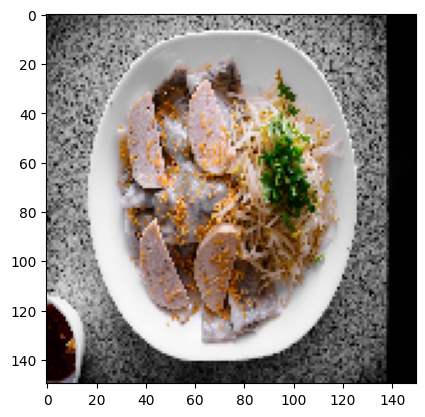

1/1 [==============================] - 0s 45ms/step
Nem


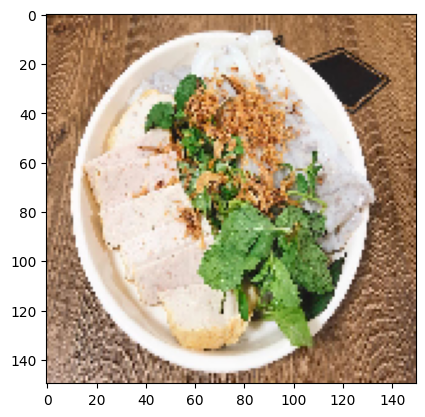

1/1 [==============================] - 0s 129ms/step
Banh mi


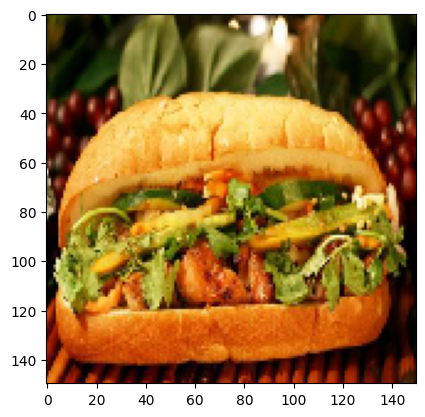

1/1 [==============================] - 0s 43ms/step
Banh mi


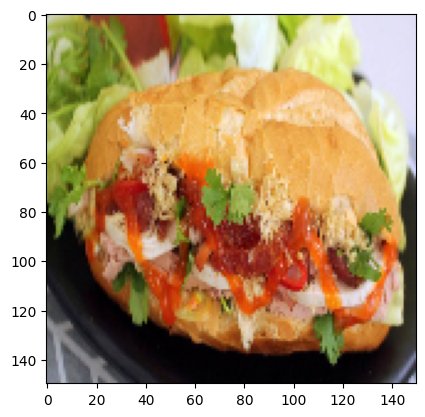

1/1 [==============================] - 0s 46ms/step
Banh pia


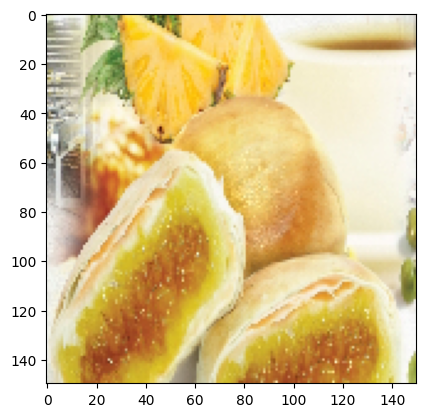

1/1 [==============================] - 0s 46ms/step
Banh tet


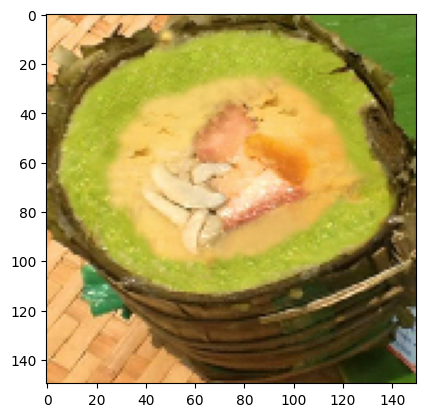

1/1 [==============================] - 0s 48ms/step
Banh xeo


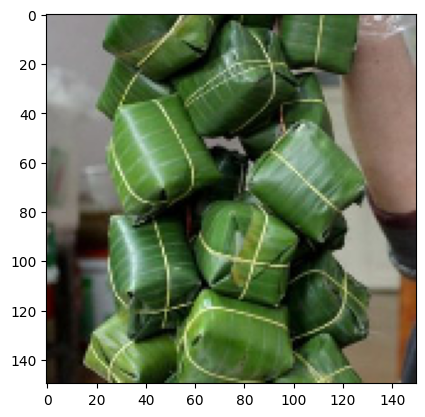

In [23]:
folder="/content/drive/MyDrive/Food VietNam/Test/Test2"

for i in os.listdir(folder):
  #img=load_img(folder+'/'+i,target_size=(150,150))
  img=load_img(folder+'/'+i,target_size=(150,150))

  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['Banh cuon','Banh mi','Banh pia','Banh tet','Bun dau mam tom','Ca kho to','Com tam','Goicuon','Banh xeo','Nem','Pho']
  print(class_name[result])
  plt.show()

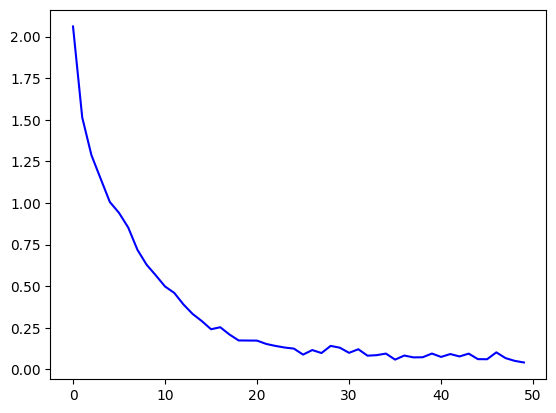

In [24]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,loss,'b',label='Training loss')
plt.show()